C:\Users\Anand B Patil\AppData\Local\Temp\ipykernel_35736\1529138681.py:224: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2023-01-01', periods=1000, freq='H')


Dataset Shape: (1000, 3)

First 5 rows:
                          power  temperature   humidity
datetime                                               
2023-01-01 00:00:00  109.556015    21.065051  45.427305
2023-01-01 01:00:00   77.976138    19.856295  72.467098
2023-01-01 02:00:00   71.461395    24.464319  55.573468
2023-01-01 03:00:00  109.921447    32.383409  71.912618
2023-01-01 04:00:00  110.767435    26.925808  61.663008

Data Types:
power          float64
temperature    float64
humidity       float64
dtype: object

Basic Statistics:
             power  temperature     humidity
count  1000.000000  1000.000000  1000.000000
mean     99.882420    24.888650    59.867938
std      20.077745     4.978954    10.184017
min      40.219980     5.001518    25.804673
25%      85.902472    21.473601    53.247820
50%      99.250191    24.953072    59.732642
75%     112.623842    28.111366    66.923014
max     163.562266    44.579318    91.669400
Missing Values Analysis:
             Missing Va

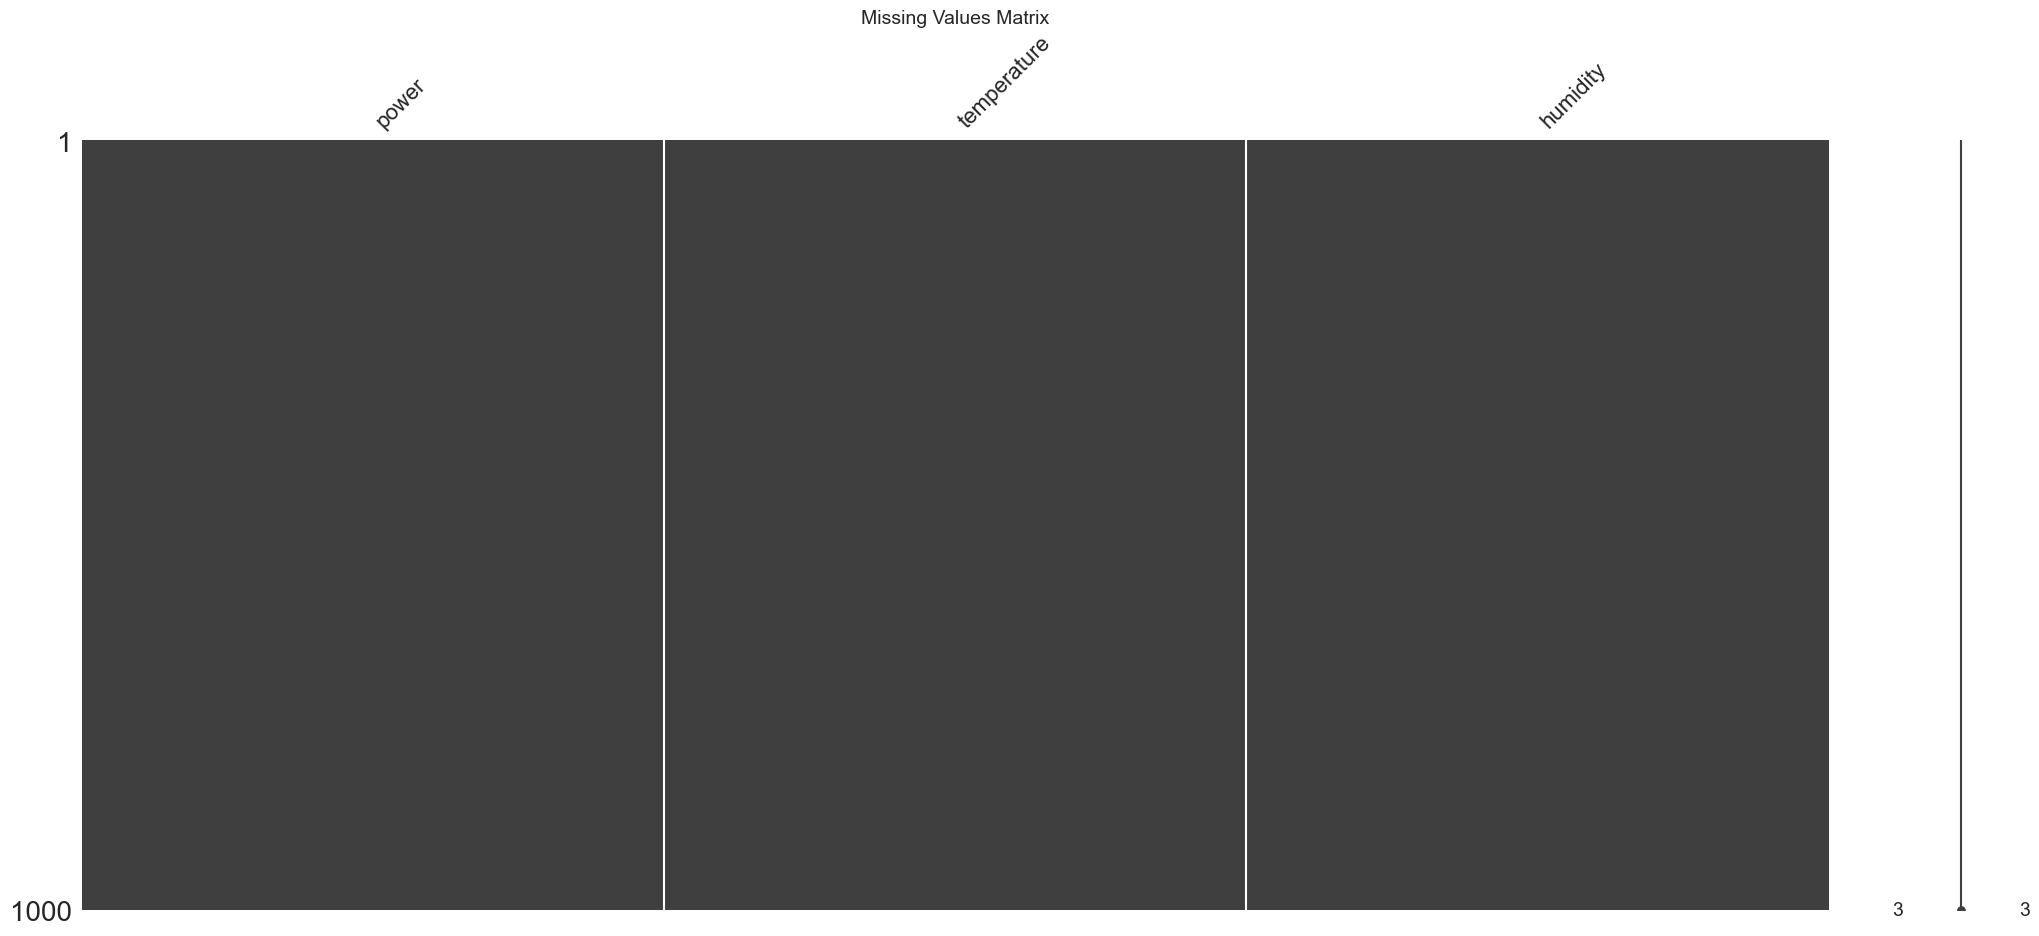

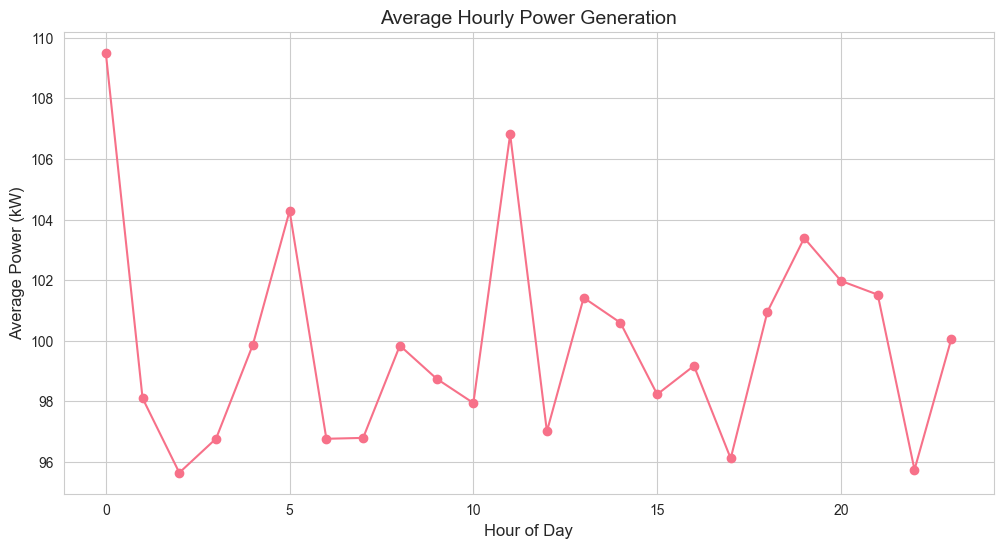

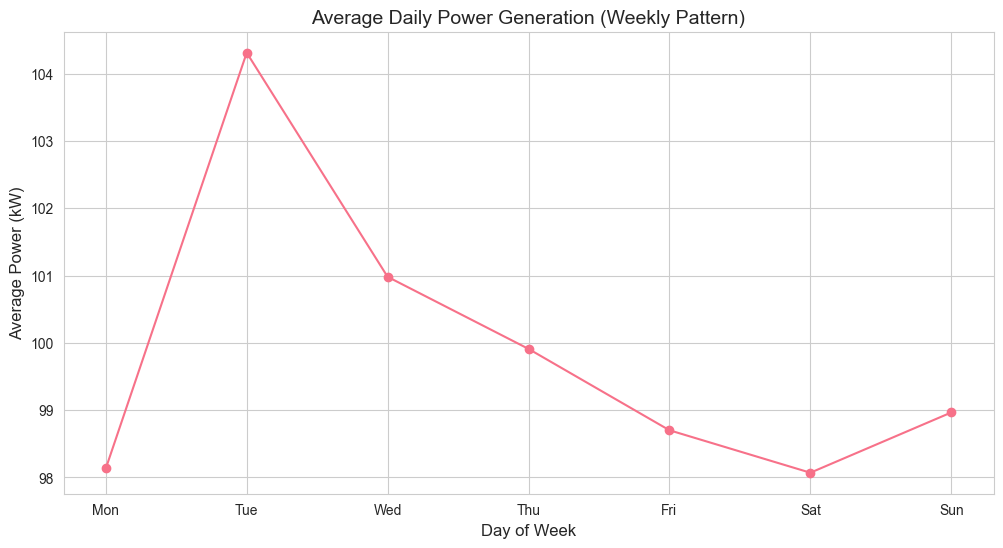

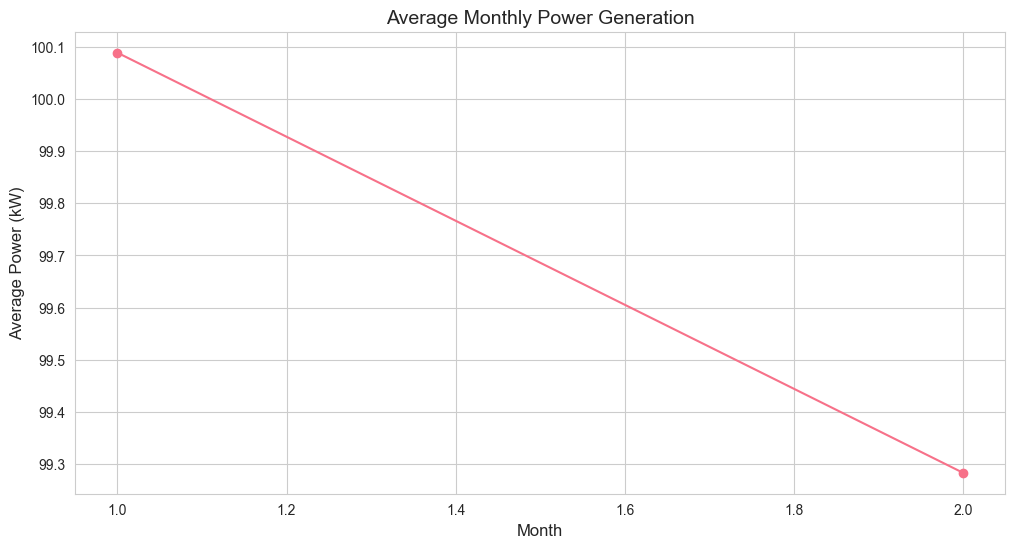

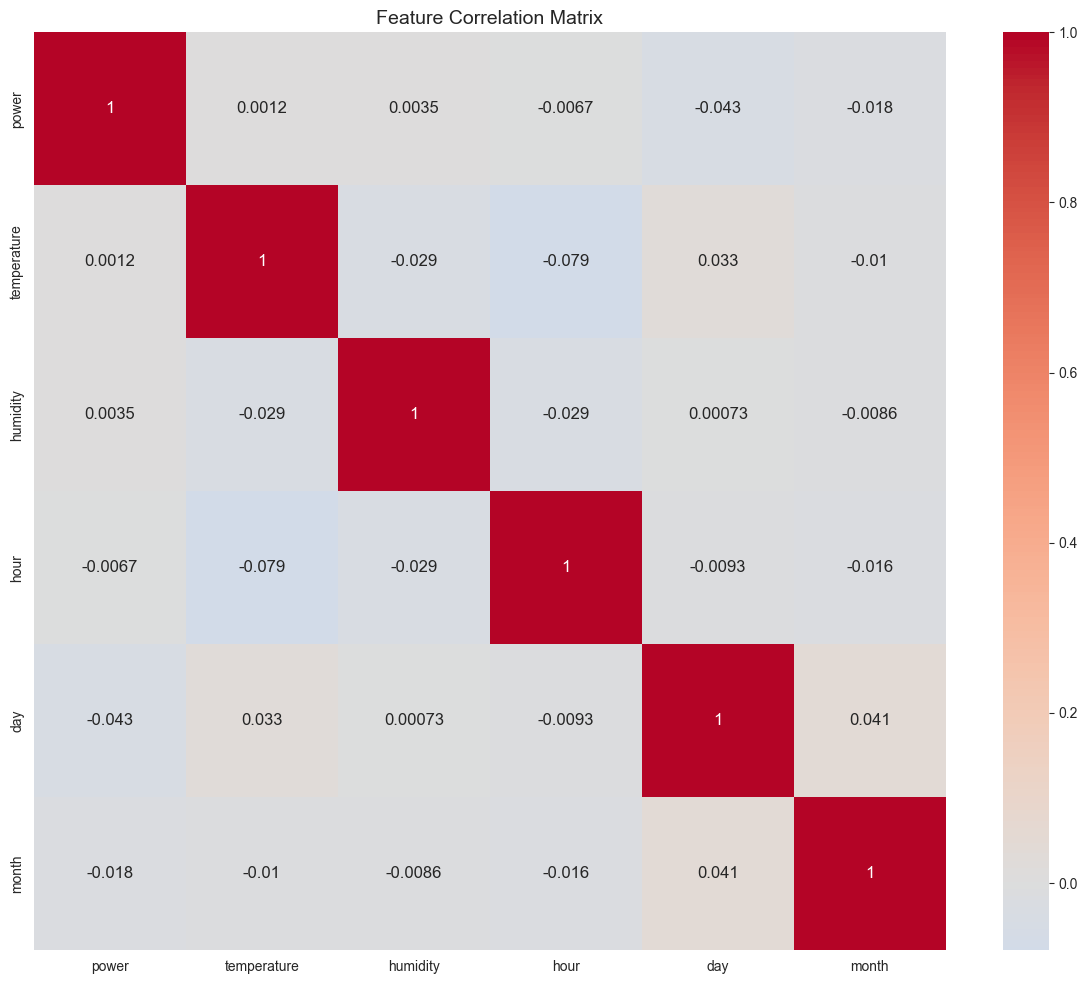

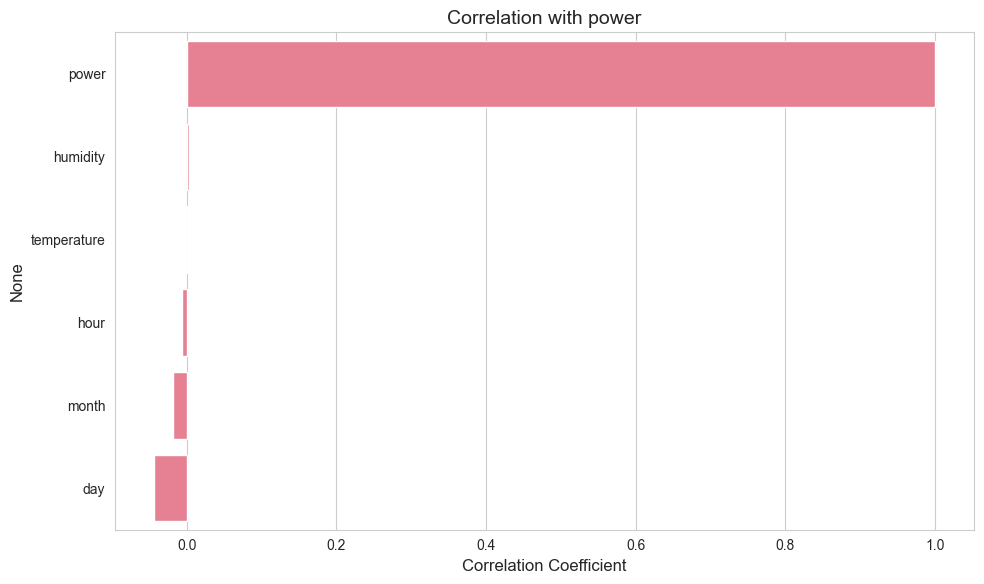

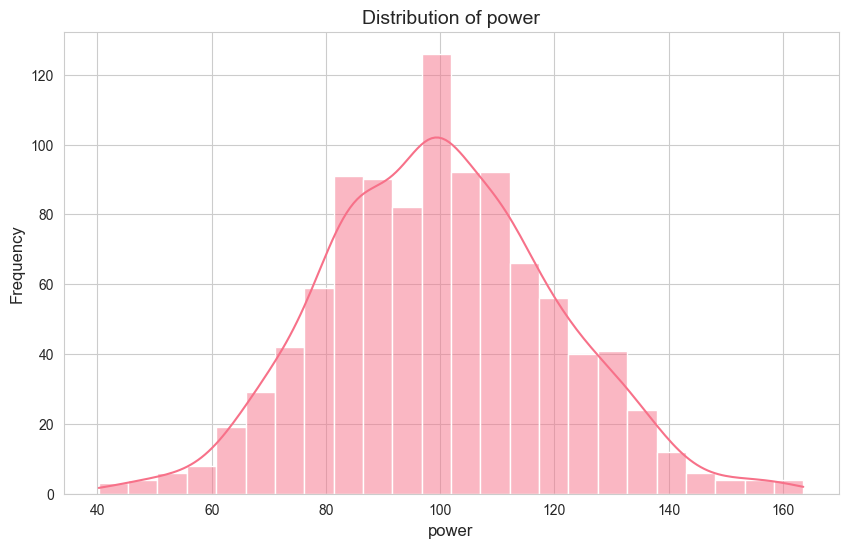

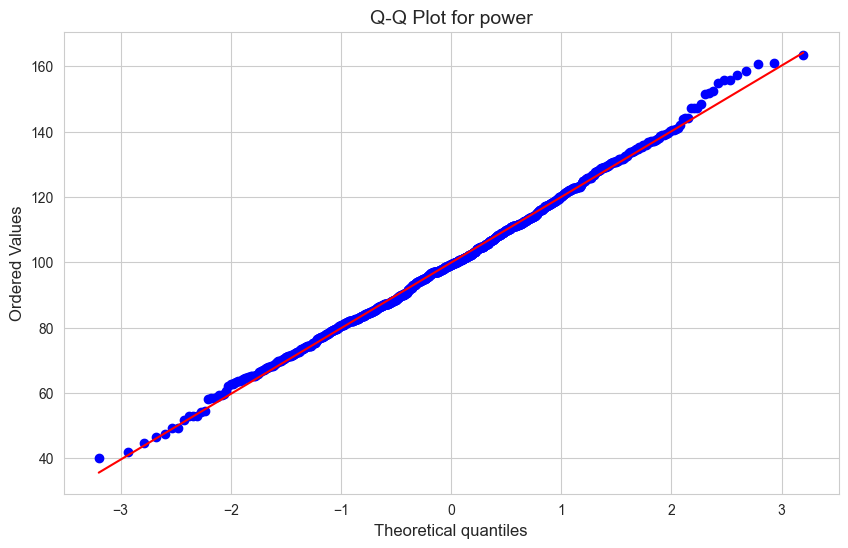

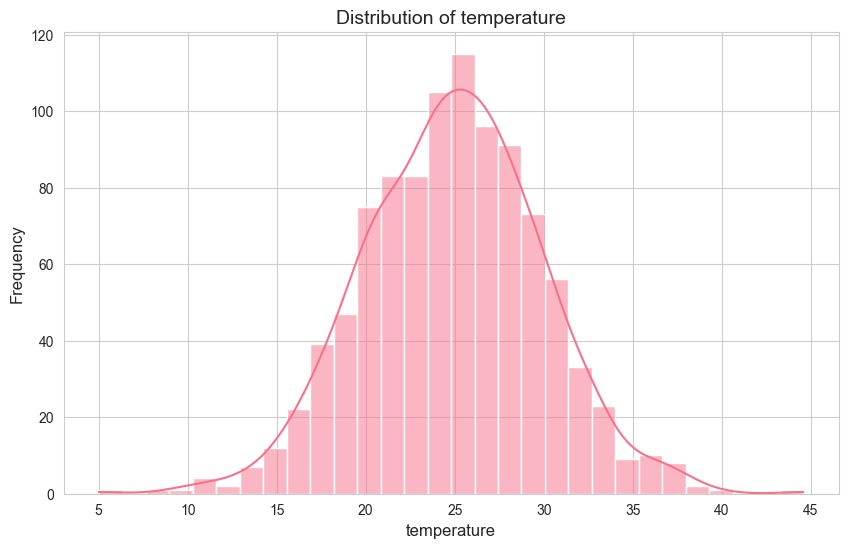

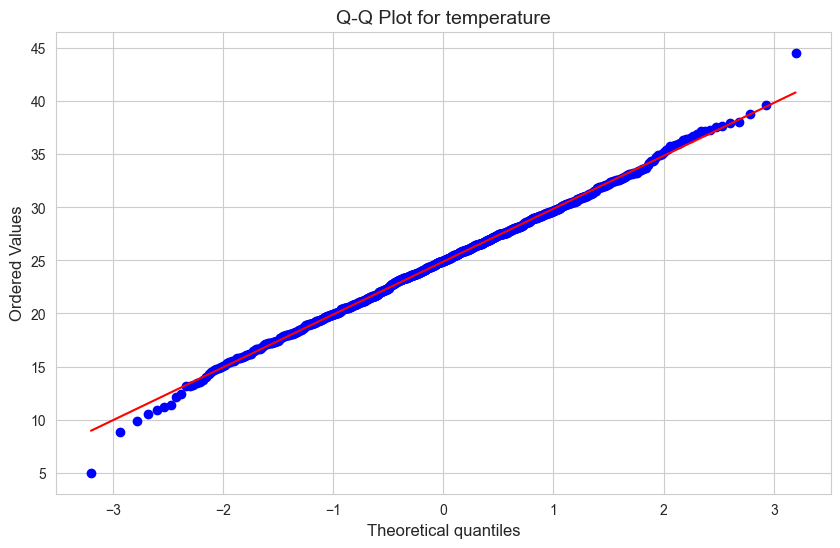

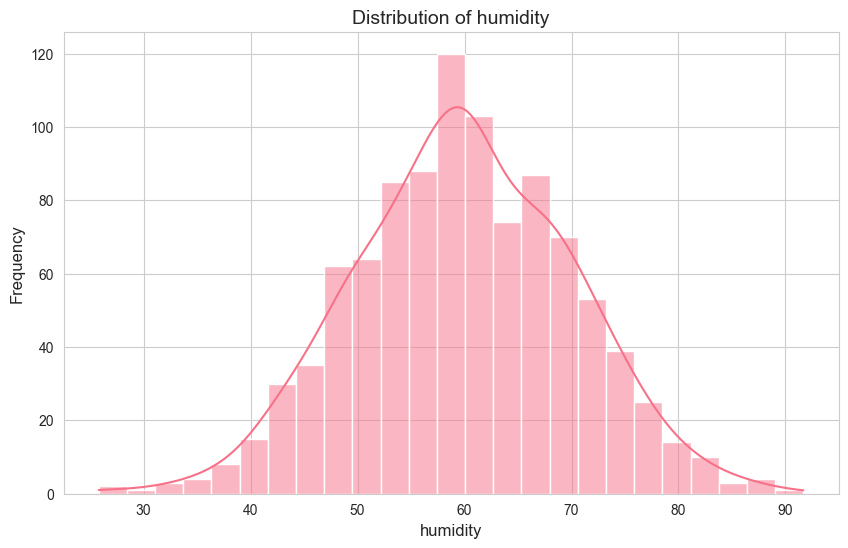

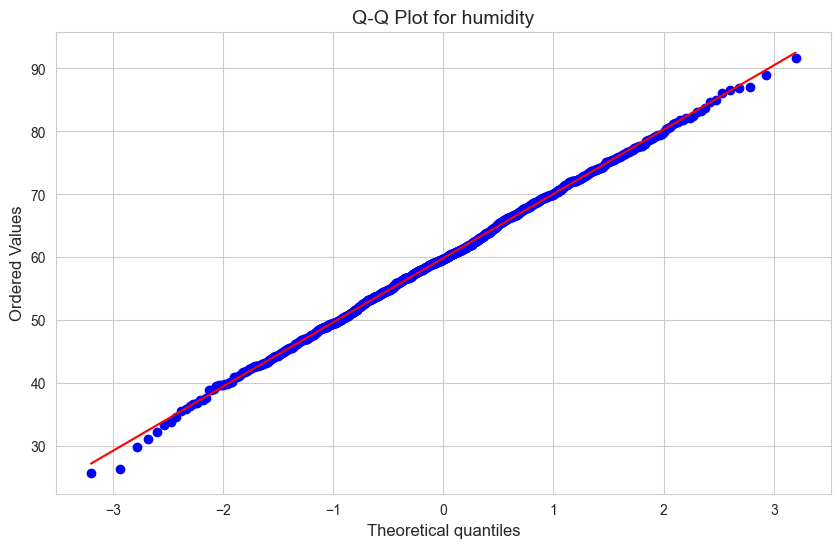

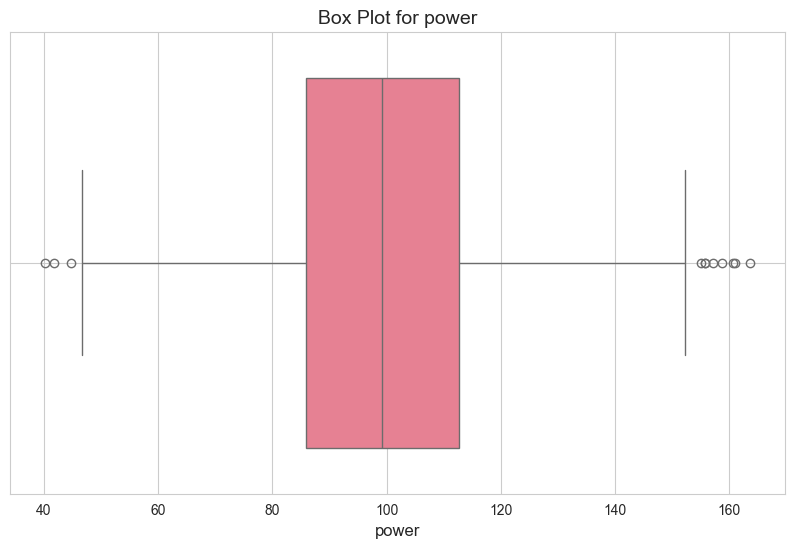


Outliers in power:
Number of outliers: 11
Percentage of outliers: 1.10%


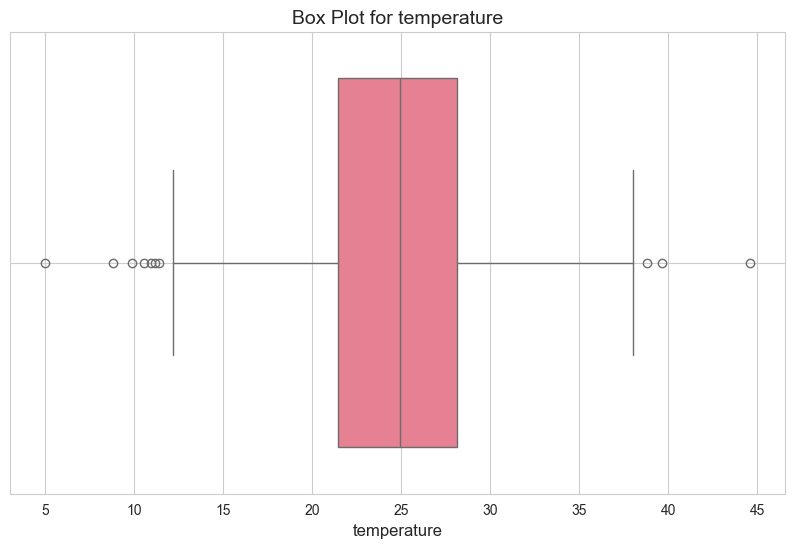


Outliers in temperature:
Number of outliers: 10
Percentage of outliers: 1.00%


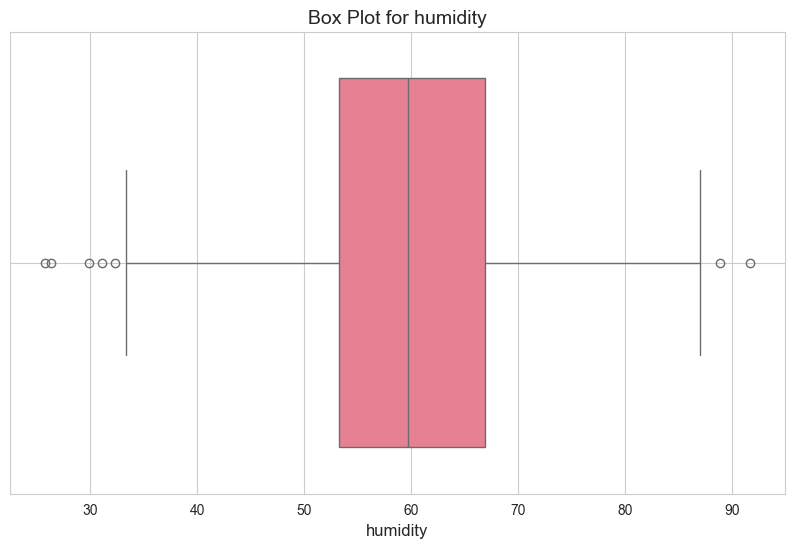


Outliers in humidity:
Number of outliers: 7
Percentage of outliers: 0.70%


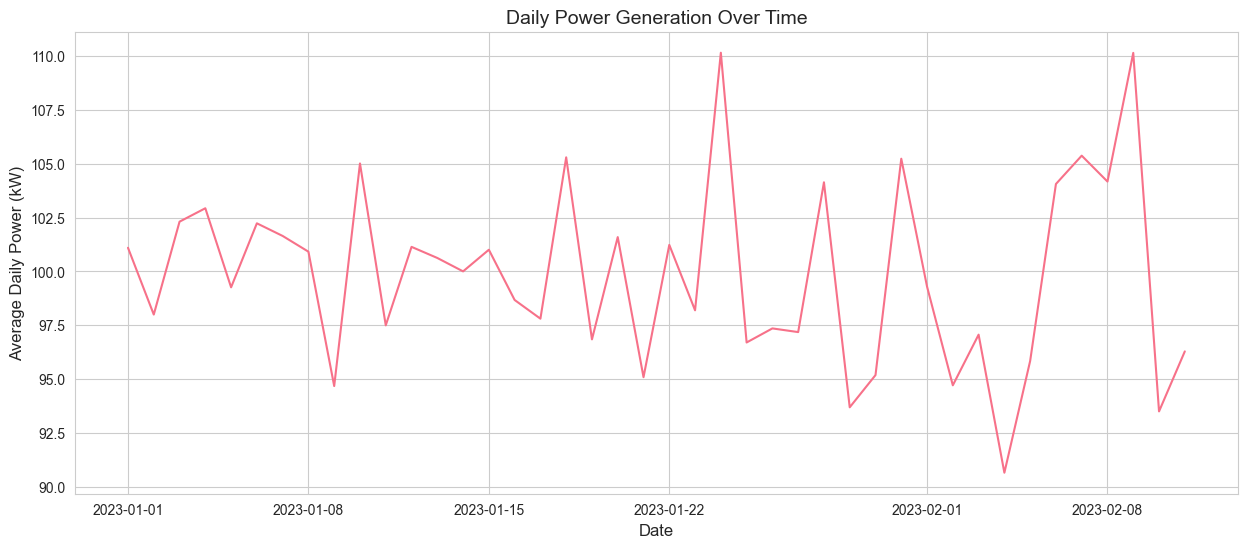

statsmodels not installed. Please install it to perform seasonal decomposition.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import missingno as msno

class SolarDataExplorer:
    def __init__(self):
        # Set style for better visualizations
        sns.set_style("whitegrid")
        sns.set_palette("husl")
        plt.rcParams['figure.figsize'] = [12, 8]
        plt.rcParams['font.size'] = 12
        plt.rcParams['axes.labelsize'] = 12
        plt.rcParams['axes.titlesize'] = 14
        plt.rcParams['xtick.labelsize'] = 10
        plt.rcParams['ytick.labelsize'] = 10

    def load_data(self, file_path):
        """Load and preprocess the data"""
        try:
            df = pd.read_csv(file_path)
            # Convert datetime column if it exists
            if 'datetime' in df.columns:
                df['datetime'] = pd.to_datetime(df['datetime'])
                df.set_index('datetime', inplace=True)
            return df
        except Exception as e:
            print(f"Error loading data: {e}")
            return None

    def basic_info(self, df):
        """Display basic information about the dataset"""
        print("Dataset Shape:", df.shape)
        print("\nFirst 5 rows:")
        print(df.head())
        print("\nData Types:")
        print(df.dtypes)
        print("\nBasic Statistics:")
        print(df.describe())

    def check_missing_values(self, df):
        """Analyze missing values in the dataset"""
        print("Missing Values Analysis:")
        missing_data = df.isnull().sum()
        missing_percentage = (missing_data / len(df)) * 100
        missing_info = pd.DataFrame({
            'Missing Values': missing_data,
            'Percentage': missing_percentage
        })
        print(missing_info)
        
        # Visualize missing values
        msno.matrix(df)
        plt.title('Missing Values Matrix')
        plt.show()

    def analyze_temporal_patterns(self, df, power_col='power'):
        """Analyze temporal patterns in the data"""
        if isinstance(df.index, pd.DatetimeIndex):
            # Daily patterns
            df['hour'] = df.index.hour
            df['day'] = df.index.dayofweek
            df['month'] = df.index.month
            
            # Hourly average
            hourly_avg = df.groupby('hour')[power_col].mean()
            plt.figure(figsize=(12, 6))
            plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
            plt.title('Average Hourly Power Generation')
            plt.xlabel('Hour of Day')
            plt.ylabel('Average Power (kW)')
            plt.grid(True)
            plt.show()
            
            # Weekly patterns
            weekly_avg = df.groupby('day')[power_col].mean()
            plt.figure(figsize=(12, 6))
            plt.plot(weekly_avg.index, weekly_avg.values, marker='o')
            plt.title('Average Daily Power Generation (Weekly Pattern)')
            plt.xlabel('Day of Week')
            plt.ylabel('Average Power (kW)')
            plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
            plt.grid(True)
            plt.show()
            
            # Monthly patterns
            monthly_avg = df.groupby('month')[power_col].mean()
            plt.figure(figsize=(12, 6))
            plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
            plt.title('Average Monthly Power Generation')
            plt.xlabel('Month')
            plt.ylabel('Average Power (kW)')
            plt.grid(True)
            plt.show()

    def analyze_correlations(self, df, target_col='power'):
        """Analyze correlations between features"""
        # Calculate correlation matrix
        corr_matrix = df.corr()
        
        # Plot correlation heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()
        
        # Plot correlations with target variable
        if target_col in df.columns:
            target_correlations = corr_matrix[target_col].sort_values(ascending=False)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=target_correlations.values, y=target_correlations.index)
            plt.title(f'Correlation with {target_col}')
            plt.xlabel('Correlation Coefficient')
            plt.tight_layout()
            plt.show()

    def analyze_distributions(self, df, columns=None):
        """Analyze distributions of features"""
        if columns is None:
            columns = df.columns
        
        for col in columns:
            if df[col].dtype in ['float64', 'int64']:
                plt.figure(figsize=(10, 6))
                sns.histplot(data=df, x=col, kde=True)
                plt.title(f'Distribution of {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
                plt.grid(True)
                plt.show()
                
                # Q-Q plot for normality check
                plt.figure(figsize=(10, 6))
                stats.probplot(df[col].dropna(), dist="norm", plot=plt)
                plt.title(f'Q-Q Plot for {col}')
                plt.grid(True)
                plt.show()

    def analyze_outliers(self, df, columns=None):
        """Analyze outliers in the data"""
        if columns is None:
            columns = df.select_dtypes(include=['float64', 'int64']).columns
        
        for col in columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[col])
            plt.title(f'Box Plot for {col}')
            plt.xlabel(col)
            plt.grid(True)
            plt.show()
            
            # Calculate IQR and identify outliers
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"\nOutliers in {col}:")
            print(f"Number of outliers: {len(outliers)}")
            print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")

    def analyze_seasonality(self, df, power_col='power'):
        """Analyze seasonal patterns in the data"""
        if isinstance(df.index, pd.DatetimeIndex):
            # Resample to daily data
            daily_data = df[power_col].resample('D').mean()
            
            # Plot time series
            plt.figure(figsize=(15, 6))
            plt.plot(daily_data.index, daily_data.values)
            plt.title('Daily Power Generation Over Time')
            plt.xlabel('Date')
            plt.ylabel('Average Daily Power (kW)')
            plt.grid(True)
            plt.show()
            
            # Decompose time series
            try:
                from statsmodels.tsa.seasonal import seasonal_decompose
                decomposition = seasonal_decompose(daily_data, period=365)
                
                plt.figure(figsize=(15, 12))
                
                plt.subplot(411)
                plt.plot(decomposition.observed)
                plt.title('Observed')
                plt.grid(True)
                
                plt.subplot(412)
                plt.plot(decomposition.trend)
                plt.title('Trend')
                plt.grid(True)
                
                plt.subplot(413)
                plt.plot(decomposition.seasonal)
                plt.title('Seasonal')
                plt.grid(True)
                
                plt.subplot(414)
                plt.plot(decomposition.resid)
                plt.title('Residual')
                plt.grid(True)
                
                plt.tight_layout()
                plt.show()
            except ImportError:
                print("statsmodels not installed. Please install it to perform seasonal decomposition.")

# Example usage
if __name__ == "__main__":
    # Initialize the explorer
    explorer = SolarDataExplorer()
    
    # Load your data
    # df = explorer.load_data('path_to_your_data.csv')
    
    # Example with sample data
    dates = pd.date_range(start='2023-01-01', periods=1000, freq='H')
    power = np.random.normal(100, 20, 1000)
    temperature = np.random.normal(25, 5, 1000)
    humidity = np.random.normal(60, 10, 1000)
    
    df = pd.DataFrame({
        'datetime': dates,
        'power': power,
        'temperature': temperature,
        'humidity': humidity
    })
    df.set_index('datetime', inplace=True)
    
    # Perform analysis
    explorer.basic_info(df)
    explorer.check_missing_values(df)
    explorer.analyze_temporal_patterns(df)
    explorer.analyze_correlations(df)
    explorer.analyze_distributions(df)
    explorer.analyze_outliers(df)
    explorer.analyze_seasonality(df)